<center><h1>Python Pandas Tutorial</h1><center>

## Pandas is Python Data Analysis Library

pandas is an open source, BSD-licensed(can use for commercial means) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

* Widely used
* Open Source
* Active Development
* Great Documentation

Home Page: http://pandas.pydata.org/

Using Documentation from: http://pandas.pydata.org/pandas-docs/stable/

Fantastic Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

Best book by Panda's creator Wes Kinney (3rd Edition 2022): https://wesmckinney.com/book/

In [1]:
import pandas as pd

In [2]:
#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

In [ ]:
# Pandas is a big package took a while...

In [3]:
import numpy as np # another big library with various numeric functions

In [4]:
import matplotlib.pyplot as plt

# Panda's two fundamental data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.
Simplest Series is from an array of data.

In [ ]:
# Let's create some Series!

In [5]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [6]:
s + 4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [ ]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [7]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [8]:
s2**2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [ ]:
### Often you want Series with an index identifying each data point with a label 

In [9]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [ ]:
## A  bit similar to dictionary isn't it?


In [10]:
labeledSeries['g']

31

In [11]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [12]:
labeledSeries.values

array([ 24,  77, -35,  31])

In [13]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [14]:
labeledSeries > 30

d    False
e     True
a    False
g     True
dtype: bool

In [15]:
# select values via a boolean array
labeledSeries[labeledSeries > 30]

e    77
g    31
dtype: int64

In [ ]:
# So Series behaves like a fixed-length, ordered dictionary with extra helper methods

In [16]:
'd' in labeledSeries

True

### Can create series from dictionary by simply passing to constructor pd.Series(mydict)

In [17]:
citydict = {'Riga': 650000, 'Tukums':20000, 'Ogre': 25000, 'Carnikava': 3000}
citydict

{'Riga': 650000, 'Tukums': 20000, 'Ogre': 25000, 'Carnikava': 3000}

In [18]:
cseries = pd.Series(citydict)
cseries

Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
dtype: int64

In [19]:
## Overwriting default index
clist = ['Jurmala', 'Riga', 'Tukums', 'Ogre', 'Daugavpils']
cseries2 = pd.Series(citydict, index = clist)
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [ ]:
# notice Carnikava was lost, since our index did not have it!
# and order was preserved from the given index list!

In [20]:
# For missing data
cseries2.isnull()

Jurmala        True
Riga          False
Tukums        False
Ogre          False
Daugavpils     True
dtype: bool

In [21]:
cseries2.dropna()

Riga      650000.0
Tukums     20000.0
Ogre       25000.0
dtype: float64

In [22]:
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [23]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils          NaN
Jurmala             NaN
Ogre            50000.0
Riga          1300000.0
Tukums          40000.0
dtype: float64

In [ ]:
# So NaN + number = NaN

In [24]:
cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
Name: Latvian Cities, dtype: int64

In [25]:
cseries.index

Index(['Riga', 'Tukums', 'Ogre', 'Carnikava'], dtype='object', name='City')

In [26]:
cseries.index = ['CarnikavaIsNotaCity','OgreEatsHumans', 'RigaIsOld', 'TukumsSmukums']
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld               25000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [27]:
# Series values are mutable
cseries['RigaIsOld']=625000
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [28]:
# How to rename individual index elements?
cseries.index[2]='RigaIsOldButFantastic'
cseries

TypeError: Index does not support mutable operations

In [ ]:
# We use Renaming method to rename individual elements

In [29]:
cseries.rename(index={'RigaIsOld':'RigaRocks'})

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaRocks              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

### Integer (Position-based) vs Label-based Indexes

Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [30]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [31]:
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. 

Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [32]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
## With a non-integer index there is no potential for ambiguity:

In [33]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [34]:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [ ]:
## To keep things consistent, if you have an axis index containing integers, data selection
##will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integers):

In [35]:
ser2.loc['b']

1.0

In [36]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [37]:
ser.iloc[:1]

0    0.0
dtype: float64

In [40]:
ser.iloc[-1]

2.0

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

Date ranges are used as indexes for time series data:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#time-series

In [41]:
dates = pd.date_range('20180521', periods=15)
dates

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range('20210422', periods=15, freq="W")

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01'],
              dtype='datetime64[ns]', freq='W-SUN')

In [43]:
pd.date_range('20200416', periods=7, freq="W-THU")

DatetimeIndex(['2020-04-16', '2020-04-23', '2020-04-30', '2020-05-07',
               '2020-05-14', '2020-05-21', '2020-05-28'],
              dtype='datetime64[ns]', freq='W-THU')

In [ ]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [44]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2023, 5, 18)

In [45]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
months

DatetimeIndex(['2023-06-01', '2023-07-03', '2023-08-01', '2023-09-01',
               '2023-10-02', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', freq='BMS')

## Reading data files

In [46]:
city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [47]:
type(city_data)

pandas.core.frame.DataFrame

In [48]:
city_series = city_data.squeeze()
type(city_series)

pandas.core.series.Series

In [49]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [50]:
city_series["Salaspils"]

18071

In [51]:
city_series.sum()

2254964

In [52]:
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [53]:
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [57]:
bitmap = city_series < 1000
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Seda                  False
Ropažu novads         False
Ape                    True
Salacgrīvas novads    False
Krustpils novads      False
Iecavas novads        False
Ķegums                False
Pāvilostas novads     False
Lubāna                False
Priekules novads      False
Zilupes novads        False
Dobele                False
Ērgļu novads          False
Līvānu novads         False
Rucavas novads        False
Smiltene              False
Strenču novads        False
Aglonas novads        False
Ludzas novads         False
Aknīste               False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [58]:
city_series[bitmap].sort_index()

Teritoriālā vienība
Ainaži       689
Ape          850
Durbe        503
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Subate       635
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [59]:
city_series[bitmap].sort_values(ascending=False)

Teritoriālā vienība
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Ape          850
Ainaži       689
Subate       635
Durbe        503
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns. 

Each column can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index;

Think of it 
as an ordered dict of Series all sharing the same row index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray) 
rather than a list, dict, or some other collection of
one-dimensional arrays.

In [ ]:
# Many ways of Data Frame creation
# One common way is from a dict of equal-length lists or NumPy arrays

In [60]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [61]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [ ]:
# missing column simply given Nans

In [62]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [63]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [ ]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)


In [64]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [65]:
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [66]:
type(df2["budget"])

pandas.core.series.Series

In [67]:
# delete column by its name
del df2["budget"]
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


In [68]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))

# We passed 15 rows of 5 random elements and set index 
# to dates and columns to our basic list elements

df

,A,B,C,D,E
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000


In [69]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
#most columns need matching length!

Categorical data type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    

In [70]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [71]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [ ]:
## different datatypes for columns! 

In [72]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

In [73]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [74]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [75]:
df.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [76]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [77]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [78]:
df3.describe()

,A,B,C,D
count,7.0,7,6.000000,7.000000
mean,1.0,2018-05-23 00:00:00,1.083333,13.000000
min,1.0,2018-05-23 00:00:00,-5.000000,0.000000
25%,1.0,2018-05-23 00:00:00,0.250000,2.500000
50%,1.0,2018-05-23 00:00:00,2.000000,9.000000
75%,1.0,2018-05-23 00:00:00,3.375000,20.500000
max,1.0,2018-05-23 00:00:00,4.000000,36.000000
std,0.0,NaN,3.352859,13.490738


In [79]:
# basic DataFrame information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       7 non-null      float64       
 1   B       7 non-null      datetime64[ns]
 2   C       6 non-null      float64       
 3   D       7 non-null      int64         
 4   E       7 non-null      category      
 5   F       7 non-null      object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 539.0+ bytes


In [80]:
df3.info(memory_usage="deep") # more reliable info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       7 non-null      float64       
 1   B       7 non-null      datetime64[ns]
 2   C       6 non-null      float64       
 3   D       7 non-null      int64         
 4   E       7 non-null      category      
 5   F       7 non-null      object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1010.0 bytes


In [ ]:
# Transpose

In [81]:
df3.T

,0,1,2,3,4,5,6
A,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00
C,1.0,4.0,3.5,3.0,NaN,0.0,-5.0
D,0,1,4,9,16,25,36
E,test,train,test,train,test,train,train
F,aha,aha,aha,aha,aha,aha,aha


In [82]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000


In [ ]:
## Sort by Axis in reverse

In [83]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
2018-05-21,-0.190107,0.631324,-1.066876,-0.214424,2.161660
2018-05-22,-0.011644,-1.745659,0.981964,0.359579,0.040704
2018-05-23,-0.204484,-1.737806,-0.968429,-1.827893,0.495881
2018-05-24,-0.579051,-1.573151,0.301782,0.043131,-0.207693
2018-05-25,-2.478590,-0.388621,1.924486,-0.336017,0.309878
2018-05-26,1.095684,0.193276,-1.541976,-0.572894,0.084997
2018-05-27,-0.638231,0.466193,-0.007196,-0.185249,1.796373
2018-05-28,0.251508,-0.746194,1.123314,1.396591,-0.788152
2018-05-29,-0.287484,0.461841,-1.326984,0.940894,-0.483806
2018-05-30,0.175000,0.935034,-0.865776,0.689856,0.332677


In [84]:
df3.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [ ]:
# Notice NaN gets last

### Selection 

Note: while standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [85]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [86]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [87]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [88]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [89]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For getting a cross section using a label:

In [90]:
df

,A,B,C,D,E
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000


In [91]:
dates[0]

Timestamp('2018-05-21 00:00:00')

In [92]:
df.loc[dates[0]]

A    2.161660
B   -0.214424
C   -1.066876
D    0.631324
E   -0.190107
Name: 2018-05-21 00:00:00, dtype: float64

In [93]:
df.loc[dates[2:5]]

,A,B,C,D,E
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590


In [ ]:
## Selecting on a multi-axis by label:

In [94]:
df.loc[:, ['A','B','C']]

,A,B,C
2018-05-21,2.161660,-0.214424,-1.066876
2018-05-22,0.040704,0.359579,0.981964
2018-05-23,0.495881,-1.827893,-0.968429
2018-05-24,-0.207693,0.043131,0.301782
2018-05-25,0.309878,-0.336017,1.924486
2018-05-26,0.084997,-0.572894,-1.541976
2018-05-27,1.796373,-0.185249,-0.007196
2018-05-28,-0.788152,1.396591,1.123314
2018-05-29,-0.483806,0.940894,-1.326984
2018-05-30,0.332677,0.689856,-0.865776


In [95]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2018-05-23,0.495881,-1.827893,-0.968429
2018-05-24,-0.207693,0.043131,0.301782
2018-05-25,0.309878,-0.336017,1.924486


In [96]:
df.loc['20180525':'20180601',['B','C']]

,B,C
2018-05-25,-0.336017,1.924486
2018-05-26,-0.572894,-1.541976
2018-05-27,-0.185249,-0.007196
2018-05-28,1.396591,1.123314
2018-05-29,0.940894,-1.326984
2018-05-30,0.689856,-0.865776
2018-05-31,0.341264,-0.422362
2018-06-01,0.245217,1.007912


In [ ]:
# Reduction in the dimensions of the returned object:

In [97]:
df.loc['20180526', ["B", "D"]]

B   -0.572894
D    0.193276
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
## Getting scalars (single values)

In [98]:
df.loc['20180526', ["D"]]

D    0.193276
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
# same as above

In [99]:
df.at[dates[5],'D']

0.19327614185166242

In [ ]:
## Selection by Position

In [100]:
df.iloc[3]

A   -0.207693
B    0.043131
C    0.301782
D   -1.573151
E   -0.579051
Name: 2018-05-24 00:00:00, dtype: float64

In [ ]:
# By integer slices, acting similar to numpy/python:

In [101]:
df.iloc[2:5,:2]

,A,B
2018-05-23,0.495881,-1.827893
2018-05-24,-0.207693,0.043131
2018-05-25,0.309878,-0.336017


In [ ]:
# By lists of integer position locations, similar to the numpy/python style:

In [102]:
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2018-05-24,0.043131,-0.579051,0.301782
2018-05-26,-0.572894,1.095684,-1.541976
2018-05-22,0.359579,-0.011644,0.981964


In [103]:
df.iloc[2,2]

-0.9684287485700619

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method):

In [104]:
df.iat[2,2]

-0.9684287485700619

## Boolean Indexing

In [ ]:
## Using a single column’s values to select data.

In [106]:
df.A > 0.2

2018-05-21     True
2018-05-22    False
2018-05-23     True
2018-05-24    False
2018-05-25     True
2018-05-26    False
2018-05-27     True
2018-05-28    False
2018-05-29    False
2018-05-30     True
2018-05-31    False
2018-06-01    False
2018-06-02    False
2018-06-03     True
2018-06-04     True
Freq: D, Name: A, dtype: bool

In [105]:
df[df.A > 0.2]

,A,B,C,D,E
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000
2018-06-03,1.225005,-0.590541,1.078709,1.226439,-0.785975
2018-06-04,0.297052,-0.098628,0.219282,-0.225700,-0.759443


In [108]:
df > 0

,A,B,C,D,E
2018-05-21,True,False,False,True,False
2018-05-22,True,True,True,False,False
2018-05-23,True,False,False,False,False
2018-05-24,False,True,True,False,False
2018-05-25,True,False,True,False,False
2018-05-26,True,False,False,True,True
2018-05-27,True,False,False,True,False
2018-05-28,False,True,True,False,True
2018-05-29,False,True,False,True,False
2018-05-30,True,True,False,True,True


In [109]:
df[df > 0]

,A,B,C,D,E
2018-05-21,2.161660,NaN,NaN,0.631324,NaN
2018-05-22,0.040704,0.359579,0.981964,NaN,NaN
2018-05-23,0.495881,NaN,NaN,NaN,NaN
2018-05-24,NaN,0.043131,0.301782,NaN,NaN
2018-05-25,0.309878,NaN,1.924486,NaN,NaN
2018-05-26,0.084997,NaN,NaN,0.193276,1.095684
2018-05-27,1.796373,NaN,NaN,0.466193,NaN
2018-05-28,NaN,1.396591,1.123314,NaN,0.251508
2018-05-29,NaN,0.940894,NaN,0.461841,NaN
2018-05-30,0.332677,0.689856,NaN,0.935034,0.175000


In [110]:
df[df > 1]

,A,B,C,D,E
2018-05-21,2.161660,NaN,NaN,NaN,NaN
2018-05-22,NaN,NaN,NaN,NaN,NaN
2018-05-23,NaN,NaN,NaN,NaN,NaN
2018-05-24,NaN,NaN,NaN,NaN,NaN
2018-05-25,NaN,NaN,1.924486,NaN,NaN
2018-05-26,NaN,NaN,NaN,NaN,1.095684
2018-05-27,1.796373,NaN,NaN,NaN,NaN
2018-05-28,NaN,1.396591,1.123314,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,NaN,NaN,NaN,NaN,NaN


In [111]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20180521', periods=15))
s1

2018-05-21       0
2018-05-22       1
2018-05-23       8
2018-05-24      27
2018-05-25      64
2018-05-26     125
2018-05-27     216
2018-05-28     343
2018-05-29     512
2018-05-30     729
2018-05-31    1000
2018-06-01    1331
2018-06-02    1728
2018-06-03    2197
2018-06-04    2744
Freq: D, dtype: int64

In [112]:
df

,A,B,C,D,E
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000


In [113]:
df['F'] = s1
df

,A,B,C,D,E,F
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,0
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644,1
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,8
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,27
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590,64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,125
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,216
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,343
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,512
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,729


In [114]:
df['F']=42
df

,A,B,C,D,E,F
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644,42
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590,42
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42


In [115]:
df['G']=[x**3 for x in range(15)] # passing a fresh list to particular column
df

,A,B,C,D,E,F,G
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0
2018-05-22,0.040704,0.359579,0.981964,-1.745659,-0.011644,42,1
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590,42,64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729


In [116]:
df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F,G
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,-2.478590,42,64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729


In [117]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F,G
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,42.000000,42,64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729


In [118]:
df3 = df.copy()
df3

,A,B,C,D,E,F,G
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,42.000000,42,64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729


In [119]:
df3[df3 > 0.2] = -df3
df3

,A,B,C,D,E,F,G
2018-05-21,-2.161660,-0.214424,-1.066876,-0.631324,-0.190107,-42,0
2018-05-22,-33.000000,-0.359579,-0.981964,-1.745659,-0.011644,-42,-1
2018-05-23,-0.495881,-1.827893,-0.968429,-1.737806,-0.204484,-42,-8
2018-05-24,-0.207693,0.043131,-0.301782,-1.573151,-0.579051,-42,-27
2018-05-25,-0.309878,-0.336017,-1.924486,-0.388621,-42.000000,-42,-64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,-1.095684,-42,-125
2018-05-27,-1.796373,-0.185249,-0.007196,-0.466193,-0.638231,-42,-216
2018-05-28,-0.788152,-1.396591,-1.123314,-0.746194,-0.251508,-42,-343
2018-05-29,-0.483806,-0.940894,-1.326984,-0.461841,-0.287484,-42,-512
2018-05-30,-0.332677,-0.689856,-0.865776,-0.935034,0.175000,-42,-729


In [120]:
df    # df has not changed

,A,B,C,D,E,F,G
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,42.000000,42,64
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729


In [ ]:
# Missing Data
# pandas primarily uses the value np.nan to represent missing data. 
# It is by default not included in computations.

In [121]:
df['H'] = np.nan
df

,A,B,C,D,E,F,G,H
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0,NaN
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1,NaN
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8,NaN
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27,NaN
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,42.000000,42,64,NaN
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125,NaN
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216,NaN
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343,NaN
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512,NaN
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729,NaN


In [122]:
df.fillna(value=3.14)

,A,B,C,D,E,F,G,H
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0,3.14
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1,3.14
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8,3.14
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27,3.14
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,42.000000,42,64,3.14
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125,3.14
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216,3.14
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343,3.14
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512,3.14
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729,3.14


In [ ]:
# there is also df.dropna() to drop any ROWS! with missing data

## Operations

DataFrame methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [123]:
df.mean()

A      2.342286
B     -0.066152
C     -0.033218
D     -0.327224
E      2.632728
F     42.000000
G    735.000000
H           NaN
dtype: float64

In [124]:
df.max()

A      33.000000
B       1.396591
C       1.924486
D       1.226439
E      42.000000
F      42.000000
G    2744.000000
H            NaN
dtype: float64

In [ ]:
# Other axis

In [125]:
df.mean(axis=1)

2018-05-21      6.188797
2018-05-22     10.797749
2018-05-23      6.536753
2018-05-24      9.569288
2018-05-25     21.358532
2018-05-26     23.751298
2018-05-27     37.061699
2018-05-28     55.176724
2018-05-29     79.043495
2018-05-30    110.323827
2018-05-31    148.769504
2018-06-01    195.948505
2018-06-02    252.136703
2018-06-03    320.164805
2018-06-04    397.918938
Freq: D, dtype: float64

In [126]:
df.median(axis=1)

2018-05-21    0.000000
2018-05-22    0.981964
2018-05-23   -0.204484
2018-05-24    0.043131
2018-05-25    1.924486
2018-05-26    0.193276
2018-05-27    0.466193
2018-05-28    1.123314
2018-05-29    0.461841
2018-05-30    0.689856
2018-05-31    0.341264
2018-06-01    0.245217
2018-06-02   -0.936118
2018-06-03    1.225005
2018-06-04    0.219282
Freq: D, dtype: float64

In [127]:
df.max(axis=1)

2018-05-21      42.0
2018-05-22      42.0
2018-05-23      42.0
2018-05-24      42.0
2018-05-25      64.0
2018-05-26     125.0
2018-05-27     216.0
2018-05-28     343.0
2018-05-29     512.0
2018-05-30     729.0
2018-05-31    1000.0
2018-06-01    1331.0
2018-06-02    1728.0
2018-06-03    2197.0
2018-06-04    2744.0
Freq: D, dtype: float64

In [ ]:
## String operations (df.str.*)

In [129]:
str1 = pd.Series(['APPle', 'baNAna', np.NaN, 42, 'mangO'])
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [130]:
help(str1.str)

Help on StringMethods in module pandas.core.strings.accessor object:

class StringMethods(pandas.core.base.NoNewAttributesMixin)
 |  StringMethods(data) -> 'None'
 |  
 |  Vectorized string functions for Series and Index.
 |  
 |  NAs stay NA unless handled otherwise by a particular method.
 |  Patterned after Python's string methods, with some inspiration from
 |  R's stringr package.
 |  
 |  Examples
 |  --------
 |  >>> s = pd.Series(["A_Str_Series"])
 |  >>> s
 |  0    A_Str_Series
 |  dtype: object
 |  
 |  >>> s.str.split("_")
 |  0    [A, Str, Series]
 |  dtype: object
 |  
 |  >>> s.str.replace("_", "")
 |  0    AStrSeries
 |  dtype: object
 |  
 |  Method resolution order:
 |      StringMethods
 |      pandas.core.base.NoNewAttributesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, data) -> 'None'
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  capitalize(self)
 |      Convert 

In [131]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [132]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

In [ ]:
## Apply

In [133]:
df

,A,B,C,D,E,F,G,H
2018-05-21,2.161660,-0.214424,-1.066876,0.631324,-0.190107,42,0,NaN
2018-05-22,33.000000,0.359579,0.981964,-1.745659,-0.011644,42,1,NaN
2018-05-23,0.495881,-1.827893,-0.968429,-1.737806,-0.204484,42,8,NaN
2018-05-24,-0.207693,0.043131,0.301782,-1.573151,-0.579051,42,27,NaN
2018-05-25,0.309878,-0.336017,1.924486,-0.388621,42.000000,42,64,NaN
2018-05-26,0.084997,-0.572894,-1.541976,0.193276,1.095684,42,125,NaN
2018-05-27,1.796373,-0.185249,-0.007196,0.466193,-0.638231,42,216,NaN
2018-05-28,-0.788152,1.396591,1.123314,-0.746194,0.251508,42,343,NaN
2018-05-29,-0.483806,0.940894,-1.326984,0.461841,-0.287484,42,512,NaN
2018-05-30,0.332677,0.689856,-0.865776,0.935034,0.175000,42,729,NaN


In [134]:
df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E,F,G,H
2018-05-21,6.484980,-0.643273,-3.200628,1.893973,-0.570320,126,0,NaN
2018-05-22,99.000000,1.078737,2.945892,-5.236978,-0.034932,126,3,NaN
2018-05-23,1.487642,-5.483680,-2.905286,-5.213418,-0.613451,126,24,NaN
2018-05-24,-0.623078,0.129393,0.905346,-4.719454,-1.737153,126,81,NaN
2018-05-25,0.929635,-1.008050,5.773459,-1.165863,126.000000,126,192,NaN
2018-05-26,0.254991,-1.718681,-4.625929,0.579828,3.287052,126,375,NaN
2018-05-27,5.389119,-0.555748,-0.021587,1.398580,-1.914694,126,648,NaN
2018-05-28,-2.364457,4.189772,3.369943,-2.238583,0.754523,126,1029,NaN
2018-05-29,-1.451417,2.822681,-3.980951,1.385524,-0.862451,126,1536,NaN
2018-05-30,0.998030,2.069568,-2.597328,2.805102,0.524999,126,2187,NaN


In [135]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, 
                  columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [136]:
df.groupby('key')

In [137]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [138]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``

### Time series

In [140]:
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [141]:
ts

2008-11-18   -1.304726
2008-11-19   -2.114792
2008-11-20   -0.980556
2008-11-21    0.668538
2008-11-22    0.974366
                ...   
2018-11-11   -0.228091
2018-11-12   -0.320541
2018-11-13   -0.355809
2018-11-14   -0.772874
2018-11-15   -0.131702
Freq: D, Length: 3650, dtype: float64

In [142]:
ts = ts.cumsum() # cumulative sum

In [143]:
ts

2008-11-18   -1.304726
2008-11-19   -3.419518
2008-11-20   -4.400075
2008-11-21   -3.731537
2008-11-22   -2.757171
                ...   
2018-11-11    3.331529
2018-11-12    3.010987
2018-11-13    2.655179
2018-11-14    1.882305
2018-11-15    1.750603
Freq: D, Length: 3650, dtype: float64

<Axes: >

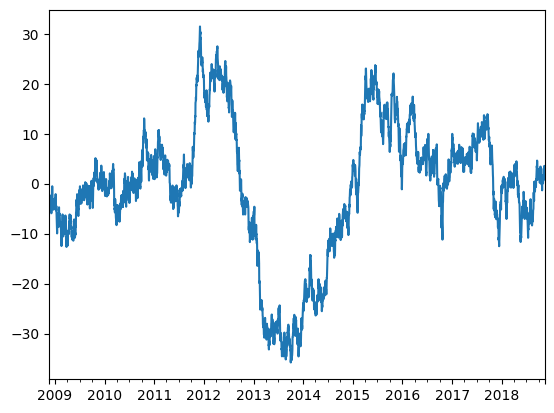

In [144]:
ts.plot()

In [145]:
ts["2014-01-01":"2016-01-01"] = np.NaN

<Axes: >

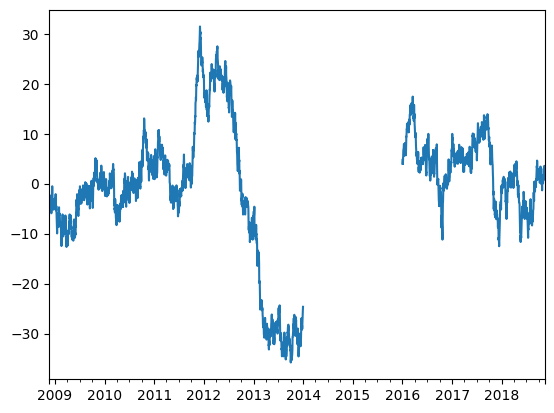

In [146]:
ts.plot()

In [147]:
rolling_avg = ts.rolling(window=90).mean()
rolling_avg

2008-11-18         NaN
2008-11-19         NaN
2008-11-20         NaN
2008-11-21         NaN
2008-11-22         NaN
                ...   
2018-11-11    0.364779
2018-11-12    0.474360
2018-11-13    0.576931
2018-11-14    0.664376
2018-11-15    0.768053
Freq: D, Length: 3650, dtype: float64

<Axes: >

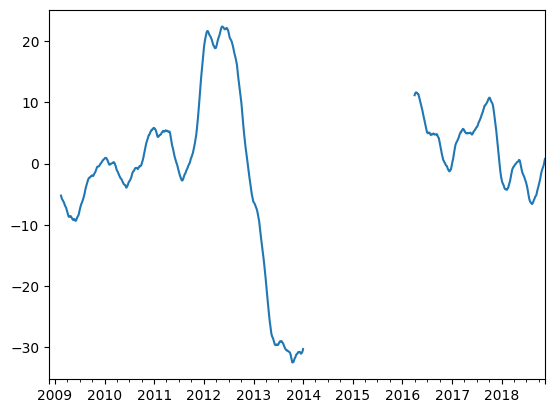

In [148]:
rolling_avg.plot()

## File operations

In [ ]:
# CSV
# Writing to a csv file.

In [149]:
df.to_csv("testing.csv")

In [ ]:
# Reading from csv


In [150]:
new_df = pd.read_csv("testing.csv", index_col=0)
new_df.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


In [ ]:
# Excel

In [152]:
# this will raise an error if 'openpyxl' package is not installed
df.to_excel('myx.xlsx', sheet_name='Sheet1')


In [153]:
df6=pd.read_excel('myx.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

In [154]:
df6.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


---

[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)